## Imports

In [12]:
import os
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, MaxPooling2D, Dense
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Datagen object creation

In [13]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
##image aug datagen
datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255., # Rescaling
    rotation_range = 40, # for augmentation
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

##normal datagen
datagen = ImageDataGenerator() # Rescaling

## Loading image with augmentation

In [14]:
image_size = (150, 150)

In [15]:
##augmented datagen
training_set = datagen_aug.flow_from_directory('C:/Users/user/Documents/GitHub/GroceryCV/GroceryStoreDataset-master/dataset/train',
                                          batch_size=64,
                                           target_size = image_size,
                                            shuffle=True,
                                          class_mode='categorical')

Found 1747 images belonging to 34 classes.


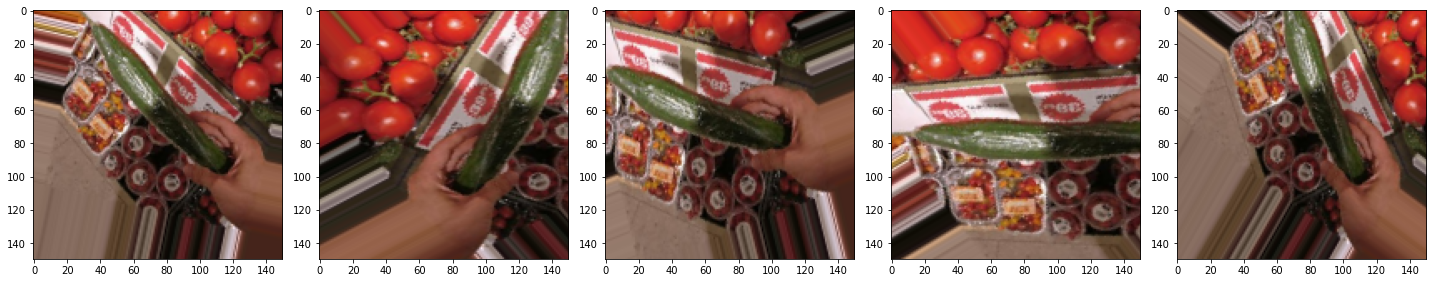

In [5]:
##plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [training_set[0][0][0] for i in range(10)]
plotImages(augmented_images)

## Load test data

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/user/Documents/GitHub/GroceryCV/GroceryStoreDataset-master/dataset/test',
                                          batch_size=32,
                                        target_size = image_size,
                                          class_mode='categorical')

Found 165 images belonging to 34 classes.


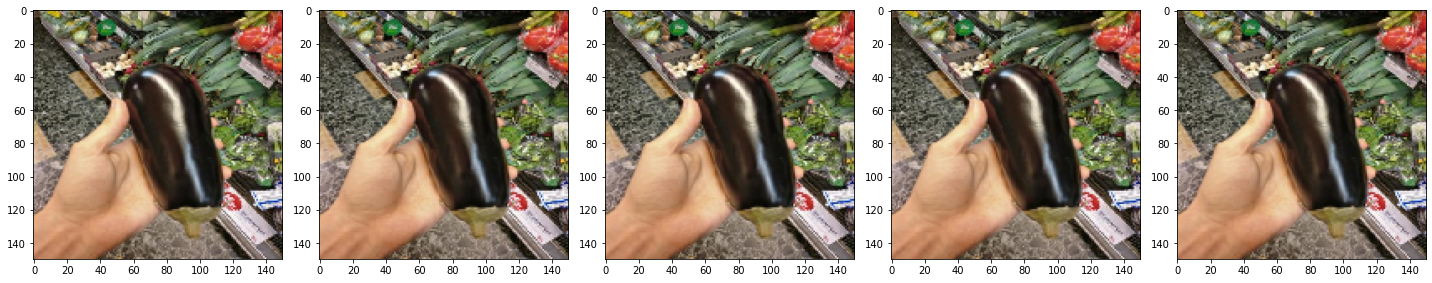

In [7]:
augmented_images = [test_set[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [17]:
labels = (training_set.class_indices)
labels

{'Apple': 0,
 'Asparagus': 1,
 'Aubergine': 2,
 'Avocado': 3,
 'Banana': 4,
 'Cabbage': 5,
 'Carrots': 6,
 'Cucumber': 7,
 'Garlic': 8,
 'Ginger': 9,
 'Juice': 10,
 'Kiwi': 11,
 'Leek': 12,
 'Lemon': 13,
 'Lime': 14,
 'Mango': 15,
 'Milk': 16,
 'Mushroom': 17,
 'Nectarine': 18,
 'Onion': 19,
 'Orange': 20,
 'Papaya': 21,
 'Passion-Fruit': 22,
 'Peach': 23,
 'Pear': 24,
 'Pepper': 25,
 'Pineapple': 26,
 'Plum': 27,
 'Potato': 28,
 'Sour-Milk': 29,
 'Soy-Milk': 30,
 'Tomato': 31,
 'Yoghurt': 32,
 'Zucchini': 33}

In [18]:
len(labels)

34

## Build Model

In [10]:
batch_norm = tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
)

In [19]:
# Initialising the CNN
# cnn = Sequential()
# cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
# # cnn.add(batch_norm)
# # cnn.add(MaxPooling2D(pool_size=(2, 2)))
# cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# # cnn.add(batch_norm)
# # cnn.add(MaxPooling2D(pool_size=(2, 2)))
# # cnn.add(batch_norm)
# cnn.add(Flatten())
# cnn.add(Dense(64, activation='relu'))
# # cnn.add(batch_norm)
# cnn.add(Flatten())
# cnn.add(Dense(len(labels), activation='softmax'))

cnn = Sequential()
cnn.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
# cnn.add(batch_norm)
cnn.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(len(labels), activation='softmax'))

# Display a model summary
cnn.summary()


cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy']
             )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 16)      1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 142, 142, 32)      12832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 138, 138, 64)      51264     
_________________________________________________________________
flatten (Flatten)            (None, 1218816)           0         
_________________________________________________________________
dense (Dense)                (None, 16)                19501072  
_________________________________________________________________
dense_1 (Dense)              (None, 34)                578       
Total params: 19,566,962
Trainable params: 19,566,962
Non-trainable params: 0
____________________________________________

## Keras Tuner

In [11]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=16, max_value=32, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=16, max_value=32, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=16, max_value=32, step=16),
        activation='relu'
    ),
    keras.layers.Dense(len(labels), activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [12]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-12-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [13]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Grocery_1")

INFO:tensorflow:Reloading Oracle from existing project output\Grocery_1\oracle.json
INFO:tensorflow:Reloading Tuner from output\Grocery_1\tuner0.json


In [14]:
tuner_search.search(training_set,epochs=10,validation_data=test_set)

Trial 4 Complete [00h 02m 24s]
val_accuracy: 0.06060606241226196

Best val_accuracy So Far: 0.24242424964904785
Total elapsed time: 00h 10m 07s
INFO:tensorflow:Oracle triggered exit


In [15]:
best_model=tuner_search.get_best_models(num_models=1)[0]

In [16]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 16)      1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 140, 140, 32)      25632     
_________________________________________________________________
flatten (Flatten)            (None, 627200)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                40140864  
_________________________________________________________________
dense_1 (Dense)              (None, 34)                2210      
Total params: 40,174,562
Trainable params: 40,174,562
Non-trainable params: 0
____________________________________________

In [ ]:
start = time.time()
history = best_model.fit(x = training_set, validation_data = test_set, epochs = 10) ## change to cnn for base model
print("Time taken:", end - start)